# VIZ for statistical comparison of errors

In [1]:
import os
import warnings

import geopandas as gpd
import matplotlib.pyplot as plt
import momepy as mm
import numpy as np
import pandas as pd
import scipy.stats

from core import stats, utils

Read in "combined" table from `statistical_comparison.ipynb`

In [5]:
combined = pd.read_csv("combined.csv")
combined = combined.set_index(["variable", "case"]).sort_index(level=0)
combined

original  cityseer     osmnx  \
variable          case                                           
avg_degree        Aleppo          0.682729  0.817101  0.732130   
                  Auckland        0.439375  0.690336  0.498237   
                  Bucaramanga     0.675186  0.757766  0.694027   
                  Douala          0.578427  0.821597  0.664304   
                  Liège           0.638495  0.777049  0.657054   
                  Salt Lake City  0.396668  0.571708  0.443200   
                  Wuhan           0.636371  0.705370  0.656532   
coordinate_count  Aleppo          0.837659  0.883312  0.874491   
                  Auckland        0.727216  0.801653  0.753880   
                  Bucaramanga     0.826967  0.843693  0.829918   
                  Douala          0.771643  0.900438  0.869194   
                  Liège           0.817363  0.847536  0.828268   
                  Salt Lake City  0.652174  0.705272  0.711764   
                  Wuhan           0.722212  0.738722  0.750771   
edge_count        Aleppo          0.635280  0.873189  0.830912   
                  Auckland        0.403283  0.723654  0.584885   
                  Bucaramanga     0.439914  0.839615  0.625581   
                  Douala          0.464844  0.897105  0.803340   
                  Liège           0.575733  0.804240  0.706771   
                  Salt Lake City  0.397923  0.657687  0.626431   
                  Wuhan           0.519426  0.738200  0.698727   
edge_length       Aleppo          0.875160  0.873406  0.873712   
                  Auckland        0.864817  0.865031  0.861626   
                  Bucaramanga     0.895524  0.861450  0.878973   
                  Douala          0.925766  0.938496  0.910692   
                  Liège           0.828329  0.826618  0.819556   
                  Salt Lake City  0.631732  0.640805  0.613787   
                  Wuhan           0.751018  0.724122  0.742451   
node_count        Aleppo          0.481027  0.882868  0.751256   
                  Auckland        0.272266  0.673341  0.451717   
                  Bucaramanga     0.282805  0.831362  0.474431   
                  Douala          0.369398  0.859341  0.691486   
                  Liège           0.464697  0.803883  0.576657   
                  Salt Lake City  0.254606  0.630190  0.529154   
                  Wuhan           0.392398  0.759494  0.610076   
stroke_count      Aleppo          0.878125  0.859868  0.827365   
                  Auckland        0.725617  0.738539  0.651668   
                  Bucaramanga     0.892612  0.827646  0.836100   
                  Douala          0.929293  0.855325  0.781062   
                  Liège           0.818340  0.795109  0.778910   
                  Salt Lake City  0.645879  0.630765  0.550822   
                  Wuhan           0.768701  0.723513  0.694494   
stroke_length_max Aleppo          0.872386  0.843309  0.737198   
                  Auckland        0.819129  0.763319  0.601344   
                  Bucaramanga     0.913375  0.833275  0.676788   
                  Douala          0.930621  0.827105  0.654650   
                  Liège           0.850570  0.814115  0.697604   
                  Salt Lake City  0.778740  0.771506  0.603987   
                  Wuhan           0.927711  0.796216  0.652147   
stroke_length_sum Aleppo          0.841134  0.798713  0.682826   
                  Auckland        0.726223  0.662357  0.542213   
                  Bucaramanga     0.887058  0.796396  0.656150   
                  Douala          0.873784  0.750273  0.587731   
                  Liège           0.783179  0.734519  0.637507   
                  Salt Lake City  0.566652  0.584452  0.414000   
                  Wuhan           0.830773  0.654001  0.531520   

                                  parenx-voronoi  parenx-skeletonize   neatnet  
variable          case                                                          
avg_degree        Aleppo                0.8

In [ ]:
fig, ax = plt.subplots(1, 1)

In [13]:
methods_to_compare = [
    "cityseer",
    "osmnx",
    "parenx-voronoi",
    "parenx-skeletonize",
    "neatnet",
]

In [17]:
utils.city_fua.keys()

dict_keys(['Aleppo', 'Auckland', 'Bucaramanga', 'Douala', 'Liège', 'Salt Lake City', 'Wuhan'])

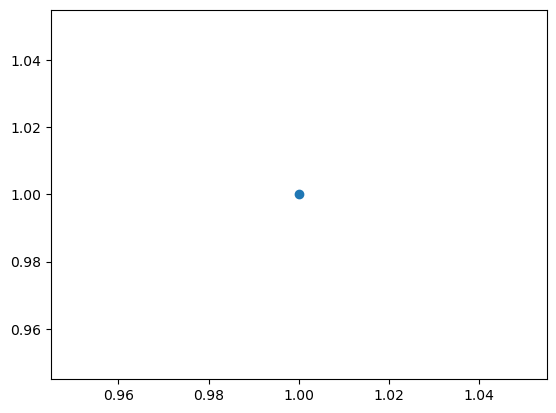

In [15]:
plt.scatter(1, 1)

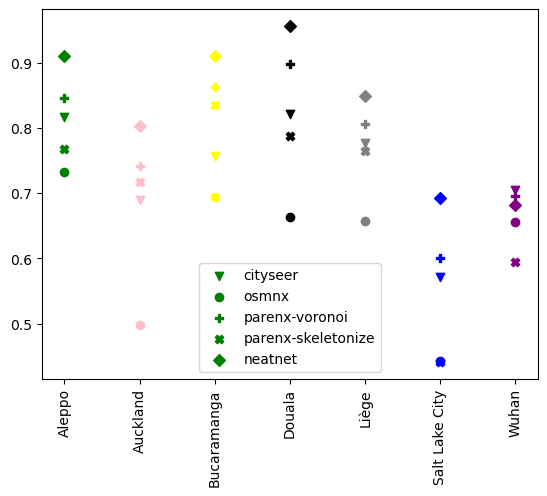

In [29]:
colors = {
    "Aleppo": "green",
    "Auckland": "pink",
    "Bucaramanga": "yellow",
    "Douala": "black",
    "Liège": "grey",
    "Salt Lake City": "blue",
    "Wuhan": "purple",
}

# markers = {
#     'Aleppo': "v",
#     'Auckland': "o",
#     'Bucaramanga': "^",
#     'Douala': "s",
#     'Liège':"P",
#     'Salt Lake City':"X",
#     'Wuhan':"D"
# }


xpos = {
    "Aleppo": 0,
    "Auckland": 1,
    "Bucaramanga": 2,
    "Douala": 3,
    "Liège": 4,
    "Salt Lake City": 5,
    "Wuhan": 6,
}

markers = {
    "cityseer": "v",
    "osmnx": "o",
    "parenx-voronoi": "P",
    "parenx-skeletonize": "X",
    "neatnet": "D",
}

fig, ax = plt.subplots(1, 1)

for case, row in combined.loc["avg_degree"].iterrows():
    for method in methods_to_compare:
        mylabel = None
        if case == "Aleppo":
            mylabel = method
        ax.scatter(
            xpos[case],
            row[method],
            color=colors[case],
            marker=markers[method],
            label=mylabel,
        )

ax.legend()
ax.set_xticks(list(xpos.values()))
ax.set_xticklabels(list(xpos.keys()), rotation=90);